In [1]:
#from imutils import face_utils
import numpy as np
import argparse
#import imutils
import dlib
import cv2
import matplotlib.pyplot as plt

In [2]:
def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
 
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

In [3]:
def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
 
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
 
	# return the list of (x, y)-coordinates
	return coords

In [4]:
def showImage(img):
    cv2.imshow('Test Image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
shape_predictor = '/home/michael/Documents/MasterThesis/python/shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor)

In [56]:
#for single image
img = cv2.imread('/home/michael/Documents/MasterThesis/python/face1')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rects = detector(gray_img, 1)
for (i, rect) in enumerate(rects):
    shape = predictor(gray_img, rect)
    shape = shape_to_np(shape)
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(img, (x, y), (x+w, y+w), (0, 255, 0), 2)
    for (x, y) in shape:
        cv2.circle(img, (x, y), 5, (0, 0, 255), -1)
showImage(img)

In [6]:
def detectFeatures(img, blank_img=None, storeFile=None):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = detector(gray_img, 1)
    for (i, rect) in enumerate(rects):
        shape = predictor(gray_img, rect)
        shape = shape_to_np(shape)
        (x0, y0, w, h) = rect_to_bb(rect)
        cv2.rectangle(img, (x0, y0), (x0+w, y0+h), (0, 255, 0), 2)
        cv2.rectangle(blank_img, (x0, y0), (x0+w, y0+h), (0, 255, 0), 2)
        if storeFile != None:
            storeFile.write('\n'+str(x0)+','+str(y0)+','+str(w)+','+str(h))
        for (x, y) in shape:
            cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
            cv2.circle(blank_img, (x, y), 3, (0, 0, 255), -1)
            if storeFile != None:
                storeFile.write(','+str(x)+','+str(y))

In [7]:
# v2.0 of function above. does not save markers to file but returns array
def detectFeatures(img, blank_img=None):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = detector(gray_img, 1)
    for (i, rect) in enumerate(rects):
        shape = predictor(gray_img, rect)
        shape = shape_to_np(shape)
        (x0, y0, w, h) = rect_to_bb(rect)
        cv2.rectangle(img, (x0, y0), (x0+w, y0+h), (0, 255, 0), 2)
        cv2.rectangle(blank_img, (x0, y0), (x0+w, y0+h), (0, 255, 0), 2)
        for (x, y) in shape:
            cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
            cv2.circle(blank_img, (x, y), 3, (0, 0, 255), -1)

In [160]:
def smoothFeatures(fileName, length):
    num_lines = sum(1 for line in open(fileName))
    if num_lines/length < 0.99:
        print "More than 1% of the frames were lost. Aborting"
        return False
    f = open(fileName, 'r')
    f.readline()
    f.readline()
    positionMarker1 = []
    for l in f:
        s = l.split(',')
        positionMarker1.append([s[6],s[7]])
    return positionMarker1

439


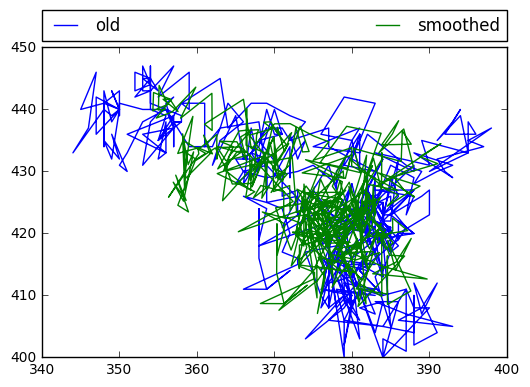

In [175]:
a = smoothFeatures(fileName, length*fps)
x = []
y = []
for i  in a:
    x.append(i[0])
    y.append(i[1])
plt.plot(x, y, label="old")
b = np.fft.fft2(a)
print len(b)
#plt.plot(np.absolute(b))
#plt.show()
b[435:,:] = np.zeros((len(b)-435,2))
c = np.fft.ifft2(b)
x = []
y = []
for i  in c:
    x.append(i[0])
    y.append(i[1])
plt.plot(x, y, label="smoothed")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

In [8]:
cap = cv2.VideoCapture('/home/michael/Documents/MasterThesis/python/null_0_16_22.3gp')
#cap = cv2.VideoCapture('/home/michael/Documents/MasterThesis/python/549229_12_0_28.3gp')
#cap = cv2.VideoCapture('/home/michael/Documents/MasterThesis/python/549088_10_22_3.3gp')
#cap = cv2.VideoCapture('/home/michael/Documents/MasterThesis/python/549088_0_18_52.3gp')
#cap = cv2.VideoCapture('/home/michael/Documents/Master Thesis/IEMOCAP/DivX/Ses01M_impro01.avi')
fileName = 'markers.txt'
f = open(fileName, 'w')

width = int(cap.get( cv2.CAP_PROP_FRAME_WIDTH ))   # float
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) # float
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # float
fps = cap.get(cv2.CAP_PROP_FPS)
length /= fps
fourcc=cv2.VideoWriter_fourcc('X','V','I','D') 
#fourcc=cv2.VideoWriter_fourcc('H','2','6','4') 
print(fps)
print(length)
out = cv2.VideoWriter('/home/michael/Documents/MasterThesis/python/output.avi',fourcc, fps, (int(width),int(height)))
out2 = cv2.VideoWriter('/home/michael/Documents/MasterThesis/python/output2.avi',fourcc, fps, (int(width),int(height)))

f.write('faceX,faceY,faceW,faceH,markersX,markersY\n')

fps = round(fps)
i = 0
while(cap.isOpened()):
    i+=1
    if(i%fps == 0):
        print(i/fps, ' of ', length, ' seconds analyzed')
        #if i/fps == 3:
        #    break
    ret, frame = cap.read()

    #find better condition here, like gray == None
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
        print(frame)
        break

    blank_image = np.zeros((height,width,3), np.uint8)
    blank_image[:,:] = (255, 255, 255)
    #showImage(blank_image)
    detectFeatures(frame, blank_image)
    #showImage(blank_image)
    out.write(frame)
    out2.write(blank_image)
    #cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
f.close()
cap.release()
out.release()
cv2.destroyAllWindows()
print('Video ready.')

29.9806048024
14.6428
[[386 383]
 [379 421]
 [377 462]
 [379 504]
 [384 545]
 [395 586]
 [415 619]
 [445 641]
 [487 648]
 [536 648]
 [583 636]
 [626 617]
 [660 587]
 [684 550]
 [698 507]
 [707 466]
 [714 423]
 [393 332]
 [407 309]
 [434 300]
 [462 302]
 [489 311]
 [549 315]
 [581 309]
 [615 315]
 [645 333]
 [663 360]
 [511 361]
 [506 391]
 [499 419]
 [492 449]
 [461 473]
 [476 480]
 [493 487]
 [513 484]
 [534 479]
 [418 369]
 [434 358]
 [453 359]
 [471 374]
 [451 377]
 [432 376]
 [564 381]
 [585 370]
 [605 373]
 [622 387]
 [603 391]
 [582 388]
 [436 536]
 [455 525]
 [475 518]
 [492 524]
 [511 522]
 [536 531]
 [565 543]
 [532 553]
 [506 555]
 [487 556]
 [470 554]
 [452 549]
 [445 537]
 [473 537]
 [491 539]
 [509 539]
 [554 542]
 [508 539]
 [490 539]
 [473 537]]


NameError: global name 'storeFile' is not defined